In [1]:
import dlm_functions as dlm
import numpy as np
from datetime import datetime

This is the example from the paper code repo with modification for changing the observation period (see `gap` named variable).

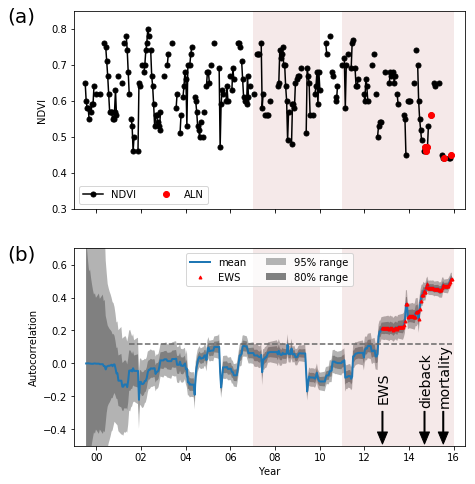

In [3]:
# NDVI time seires
N = np.loadtxt('Inputs/NDVI.txt')
fill_value = -999

# climate conditions in order: 
# precipitation plus snowmelt (mm/day)  
# air temperature (degree C)
# vapor pressure deficit (kPa)
# net shortwave radiation (W/m2)
CLM = np.loadtxt('Inputs/CLM.txt') 

# daily averages of climate conditions in the same order
AvgCLM = np.loadtxt('Inputs/AvgCLM.txt') 

# compute climate anomaly within each interval of two NDVI observations
date0 = datetime(1999,6,30) # the data of first NDVI obervation
anCLM = dlm.computeAnormaly(CLM, AvgCLM, date0, gap=16)

# center NDVI time series
N[N==fill_value] = np.nan
Y = N[1:]-np.nanmean(N) 

# use two seasonal harmonic components
rseas = [1,2] 

# include lag-1 centerred NDVI and precipitation in the regression module 
X = np.column_stack((N[:-1]-np.nanmean(N),anCLM[:-1,0])) 

# set up model and run forward filtering
delta = 0.98
M = dlm.Model(Y,X,rseas,delta)
FF = dlm.forwardFilteringM(M)

# model likelihood
slik = FF.get('slik')

# extract estimates on the coefficient corresponding to lag-1 NDVI
vid = 2 # index of autocorrelation
sm = FF.get('sm')[vid,:] # mean of autocorrelation
sC = FF.get('sC')[vid,vid,:] # variance of autocorrelation
snu = FF.get('snu') # degree of freedom

# plot Fig. 1 in the manuscript
dlm.PlotEWS(N, date0, sm, sC, snu)